In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_clusters = 4

Ex.1 Please analyse the function parameters and generated output.

In [2]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [3]:
x, y, centers = make_blobs(n_samples=120, n_features=2, centers=n_clusters, cluster_std=0.4, return_centers=True)

Ex.3 Analyse the x and y shape.

In [4]:
print(x.shape, y.shape)

(120, 2) (120,)


Ex.4 Plot the data samples in X to see the clusters.

All sklearn algorithms have a similar way of running:

    initialize the algorithm
    fit the model
    predict the outcome for the data


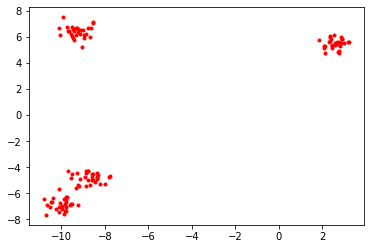

In [5]:
plt.plot(x[:,0],x[:,1],'r.')

Ex.5 Run the implemented KMeans function K-Means, fit the model and predict the outcome.


In [6]:
from sklearn.cluster import KMeans
fitter = KMeans(n_clusters=n_clusters,
                init='random',
                algorithm='elkan')
fitter.fit(x,y)
labels = fitter.fit_predict(x)
print(labels)
colors = {0:'r', 1:'g',2:'b',3:'y'}

[1 3 1 1 1 0 3 2 2 1 0 0 1 0 0 0 2 3 1 3 2 0 0 1 2 1 3 3 2 0 0 0 3 0 1 2 0
 3 0 1 0 2 1 2 0 3 1 3 3 2 2 0 2 1 3 3 2 2 2 1 1 1 0 3 0 3 3 1 0 1 1 3 3 3
 1 2 3 2 1 2 3 1 0 3 2 3 3 0 2 2 1 0 3 0 0 0 1 3 0 2 1 3 3 2 2 3 2 0 1 3 1
 0 2 2 2 1 3 1 2 2]


Ex.6 Plot the results in order to see whether the clustering worked.

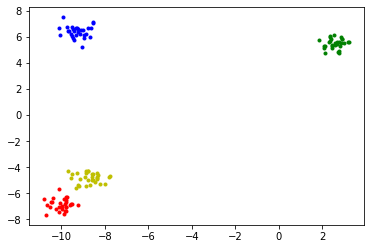

In [7]:
plt.figure()
for sample_nr in range(x.shape[0]):
    color = colors[labels[sample_nr]]
    plt.plot(*x[sample_nr],f'{color}.')

Ex 7.

In [8]:
fitter.inertia_

39.74483806244195

Ex.1 Run K-Means for the previous ex. while changing the parameter in KMeans function:

In [9]:
from sklearn.cluster import KMeans
fitter = KMeans(n_clusters=n_clusters,
                init='k-means++',
                algorithm='elkan')
fitter.fit(x,y)

KMeans(algorithm='elkan', n_clusters=4)

Ex.2 Calculate inertia or Dunn index.

In [10]:
fitter.inertia_
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

39.74483806244195

Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

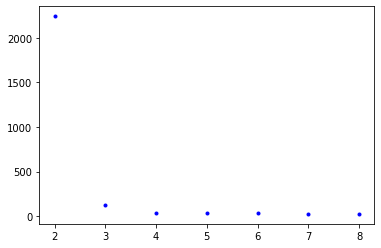

<Figure size 432x288 with 0 Axes>

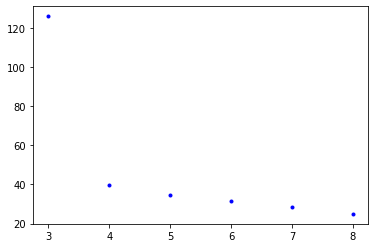

<Figure size 432x288 with 0 Axes>

In [11]:
for start in (2,3):
    inertia_s = []
    n_s = range(start,9)
    for n_clusters in n_s:
        fitter = KMeans(n_clusters=n_clusters,
                    init='k-means++',
                    algorithm='elkan')
        fitter.fit(x,y)
        inertia_s.append(fitter.inertia_)
    plt.plot(n_s, inertia_s,'b.')
    plt.figure()
    plt.show()
# zdecydowane pprzegięcie wysępuje przy n_clusters = 4

In [12]:
from sklearn.datasets import make_moons
# import seaborn as sns
# Mimo zoainstalowania python nie widzi modułu seaborn
import pandas as pd

# x, y = make_moons(1000, noise=.05, random_state=0)
# X_moon = pd.DataFrame(x, columns = ['f1','f2'])
# #TODO: Kmeans
#
# #Plot
# # X_moon['k_means'] = y_km
# sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
# plt.show()

In [13]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

Ex.1 Plot the data.

(300, 2)


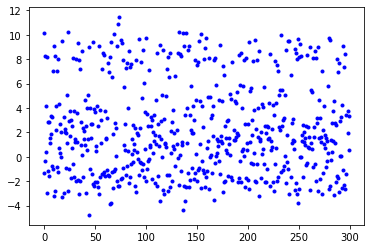

In [14]:
print(X.shape)
plt.plot(X,'b.')

Ex.2 Use the Means function with k=2 to assign points to clusters.

In Kmeans clustering, we provide the number of clusters and then the algorithm partitions the data. In agglomerative clustering, the data is grouped together based on the distance, and we can decide how many clusters we want, once we see how the data are grouped together.


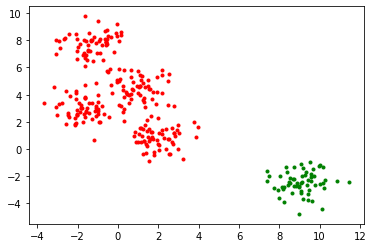

In [15]:
fitter = KMeans(n_clusters=2,
                    init='k-means++',
                    algorithm='elkan')
fitter.fit(X,y)
fitter.fit_predict(X)
labels = fitter.fit_predict(X)
colors = {0:'r', 1:'g'}
plt.figure()
for sample_nr in range(X.shape[0]):
    color = colors[labels[sample_nr]]
    plt.plot(*X[sample_nr],f'{color}.')


Ex.3 Use the scipy libraries to draw the dendrogram for the data:

from scipy.cluster.hierarchy import dendrogram, linkage

where:

    linkage is the the function that performs the clustering more
    dendrogrammore


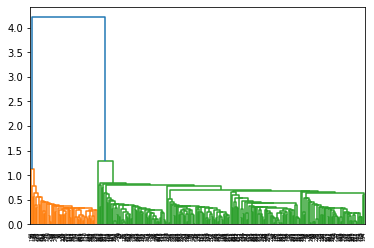

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
dendrog = dendrogram(Z)

Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

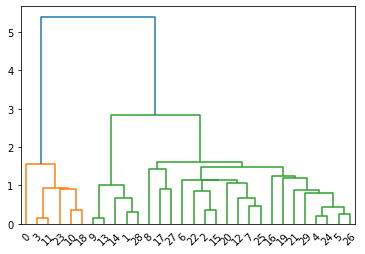

In [17]:
X2 = X[0:int(x.shape[0]/4)]
Z = linkage(X2)
dendrog = dendrogram(Z)

Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [18]:
X = pd.read_csv("shopping_data.csv")
X.head()
X = X[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

Ex.6 Create a dendrogram to chose the appropriate k value.
Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward. The linkage method takes the dataset and the method to minimize distances as parameters. We use 'ward' as the method since it minimizes then variants of distances between the clusters. (pl. Celem zadania będzie porównanie działania metody średnich połączeń (ang. avarage linkage), metody Warda, pojedynczego połączenia (ang. single linkage) oraz pełnego wiązania (ang. complete linkage).).


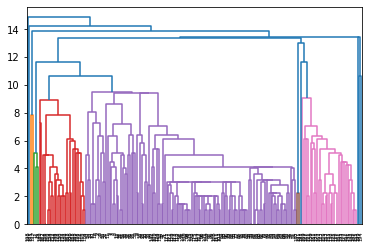

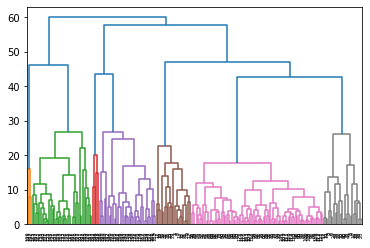

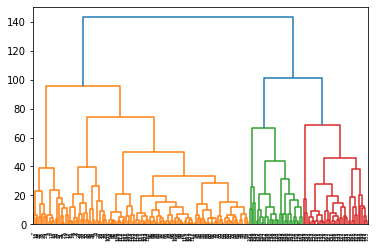

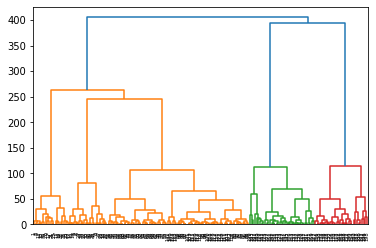

In [19]:
for name in ['single', 'average', 'complete', 'ward']:
    Z = linkage(X,method=name)
    plt.figure()
    dendrog = dendrogram(Z)
k = 6

Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

In [20]:
from sklearn.cluster import AgglomerativeClustering as AC
fitter = AC(k)
fitter.fit(X)
labels = fitter.fit_predict(X)
X = X.to_numpy()

Ex.9 Plot the clusters to see how actually our data has been clustered.

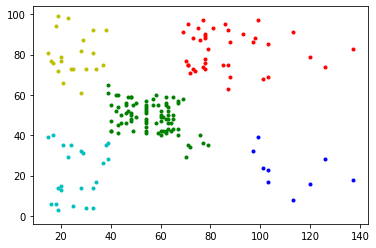

In [21]:
colors = {0:'r', 1:'g', 2:'b',3:'y',4:'c',5:'w'}
plt.figure()
for sample_nr in range(X.shape[0]):
    color = colors[labels[sample_nr]]
    plt.plot(*X[sample_nr],f'{color}.')
plt.show()

Ex.1 Create the dataset:

In [22]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

Ex.2 Determine the cluster range [2,3….]

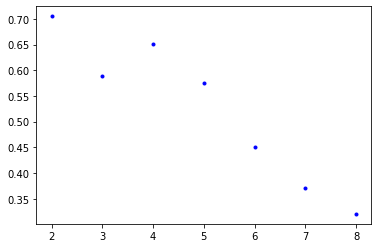

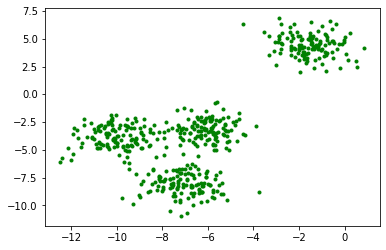

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples
start_cluster = 2
clusters_range = range(start_cluster,9)
silhouette_scores = []
silhouette_scores_samples = []
for n_clusters in clusters_range:
    fitter = KMeans(n_clusters=n_clusters)
    fitter.fit(X)
    labels = fitter.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    sil_score_samples = silhouette_samples(X, labels)
    silhouette_scores.append(sil_score)
    silhouette_scores_samples.append(sil_score_samples)

plt.plot(list(clusters_range), silhouette_scores, 'b.')
plt.show()
plt.plot(X[:,0], X[:,1], 'g.')
plt.show()

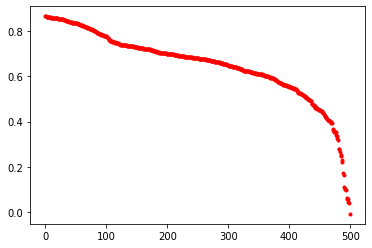

In [24]:
n_clusters = 4
cluster_nr = n_clusters - start_cluster
sil_samples = silhouette_scores_samples[cluster_nr]
fitter = KMeans(n_clusters=n_clusters)
fitter.fit(X)
samples = sorted(zip(X, sil_samples), key=lambda x: x[1], reverse=True)
_, sil = zip(*samples)
plt.plot(sil, 'r.')
plt.show()

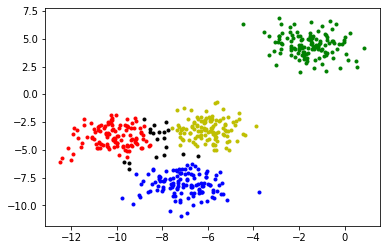

In [25]:
threshold = 0.3
good_samples = filter(lambda x: x[1]>threshold, samples)
bad_samples = filter(lambda x: x[1]<=threshold, samples)
samples, _ = zip(*good_samples)
labels = fitter.fit_predict(samples)
colors = {0:'r', 1:'g',2:'b',3:'y'}
for sample_nr in range(len(samples)):
    color = colors[labels[sample_nr]]
    plt.plot(*samples[sample_nr],f'{color}.')
samples, _ = zip(*bad_samples)
for sample_nr in range(len(samples)):
    plt.plot(*samples[sample_nr], 'k.')

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857
For n_clusters = 8 The average silhouette_score is : 0.33148538996489124


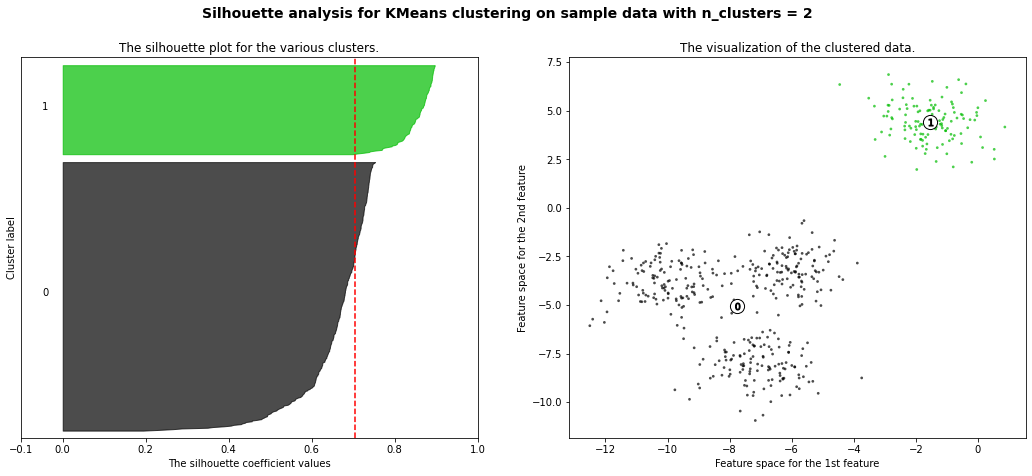

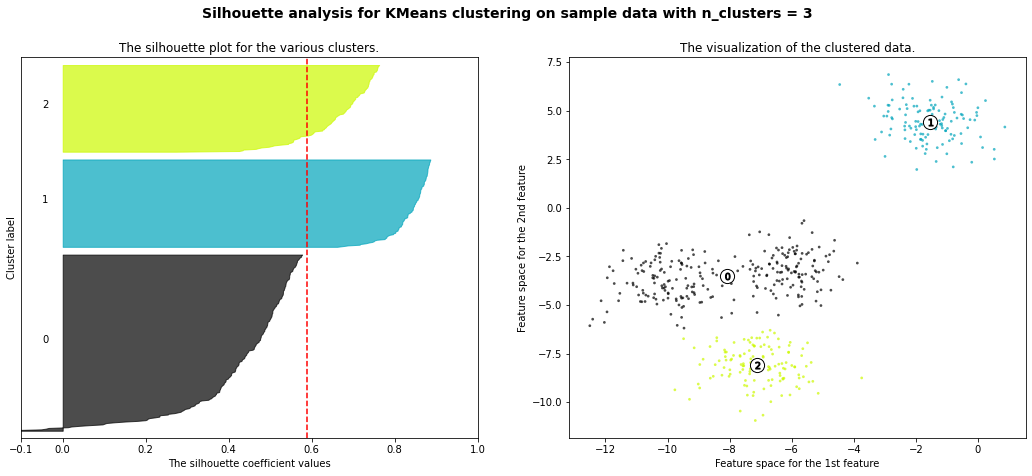

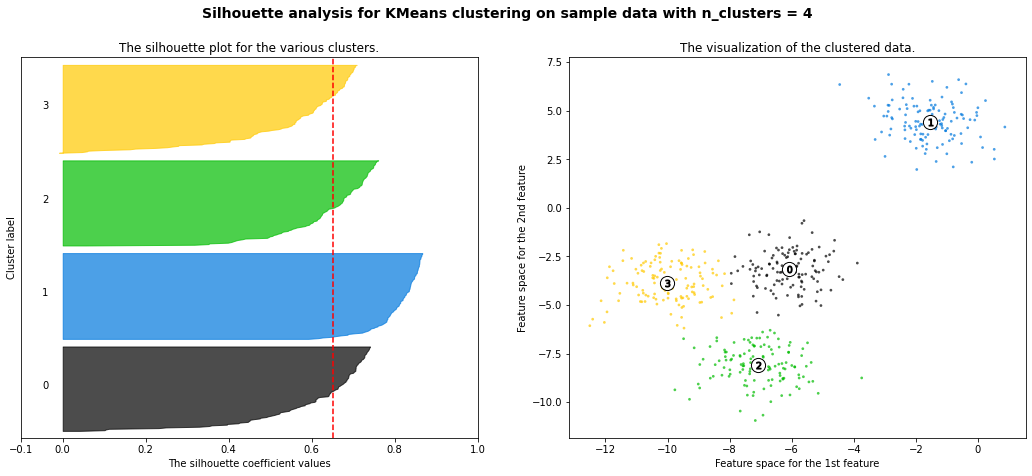

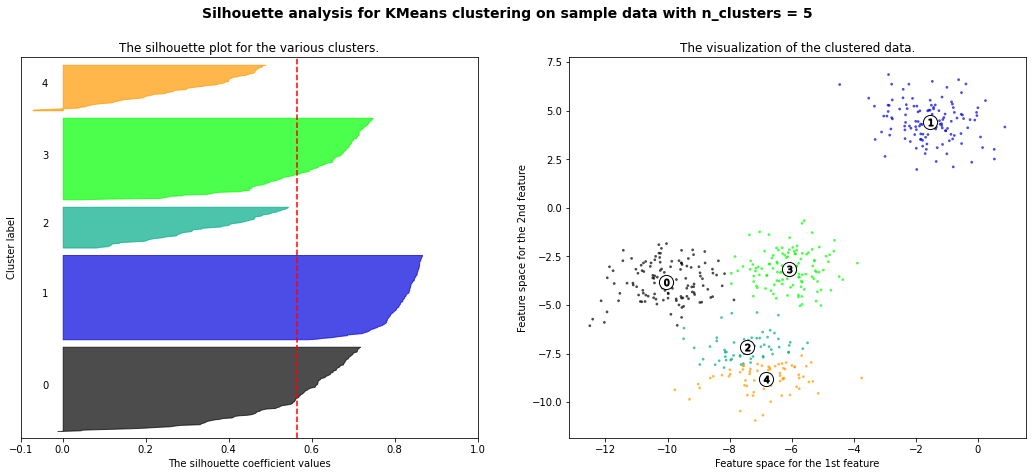

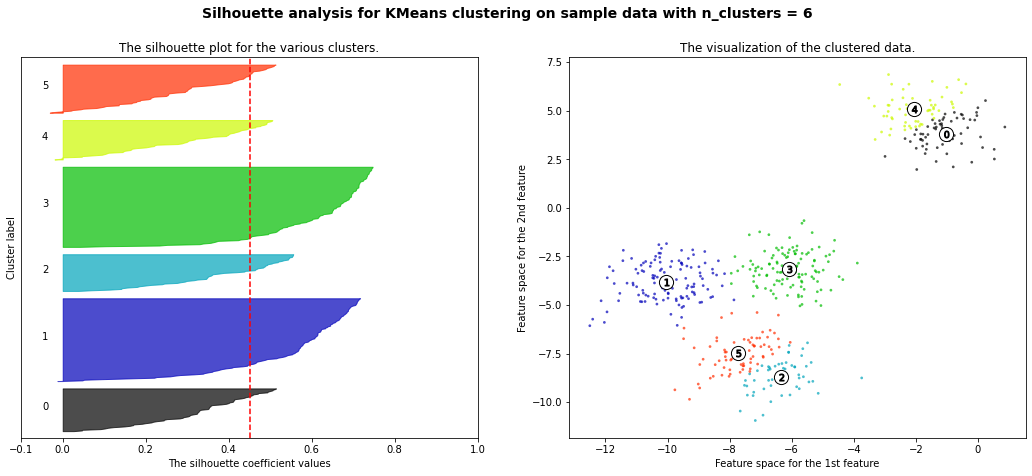

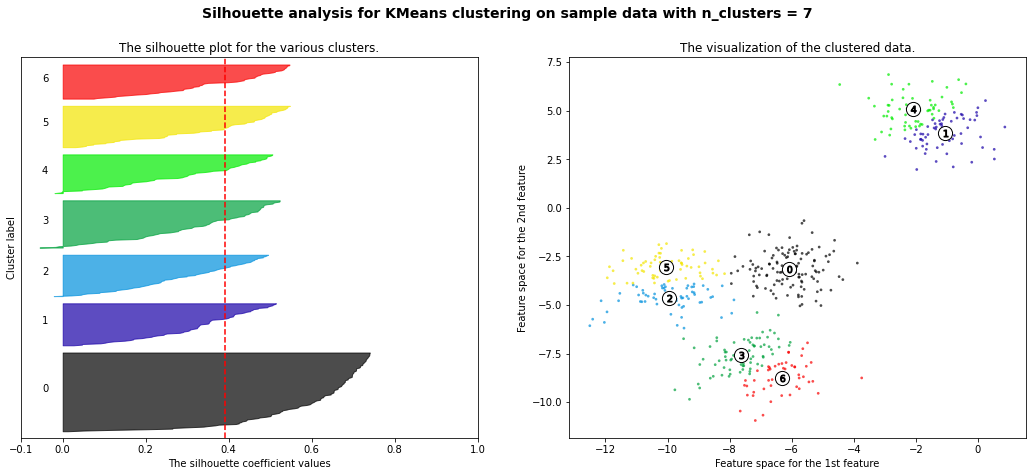

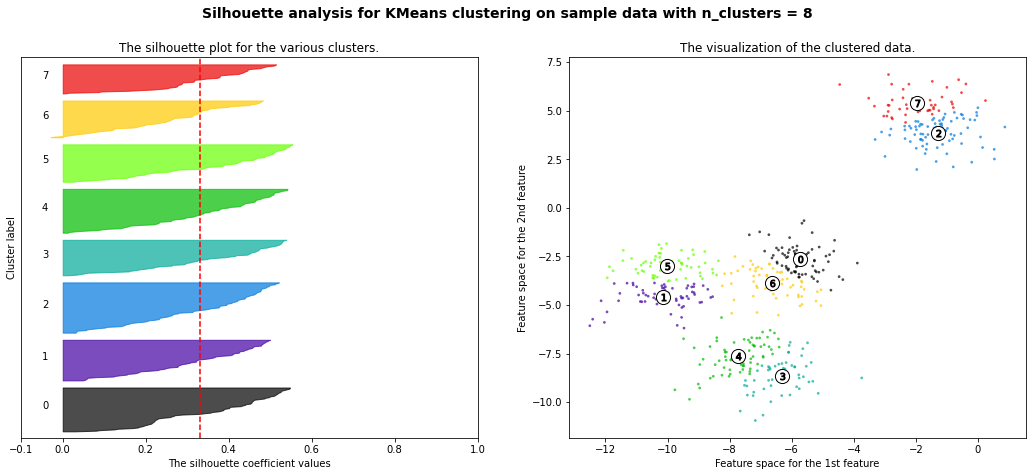

In [26]:
import matplotlib.cm as cm
import numpy as np
for n_clusters in clusters_range:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

DBSCAN algorithm
Ex.1 Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:

In [47]:
from sklearn import  datasets
from sklearn.cluster import DBSCAN


# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
bolbs2 = X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

my_datasets = [noisy_circles, noisy_moons, blobs, no_structure, bolbs2, aniso, varied]
fitters = [KMeans, AC, DBSCAN]
names = ['KMeans', 'AC', 'DBSCAN']
km_params = [{"n_clusters":n} for n in range(2,6)]
ac_params = [{"n_clusters":n, "linkage": method} for n in range(2,6) for method in ['single', 'average', 'complete', 'ward']]
dbscan_params = [{'eps': eps} for eps in (0.3,0.45, 0.6)]
params = [km_params, ac_params, dbscan_params]

In [48]:
lvls = (0,0.5,0.25,0.75,1)
colors = [[i,j,k] for i in lvls for j in lvls for k in lvls]
f = lambda x: (x[0]-x[1])**2 + (x[0]-x[2])**2 + (x[2]-x[1])**2
colors = list(sorted(colors, key=f, reverse=True))
indxs = range(len(colors))
colors = dict(zip(indxs,colors))
print(colors)

{0: [0, 0, 1], 1: [0, 1, 0], 2: [0, 1, 1], 3: [1, 0, 0], 4: [1, 0, 1], 5: [1, 1, 0], 6: [0, 0.25, 1], 7: [0, 0.75, 1], 8: [0, 1, 0.25], 9: [0, 1, 0.75], 10: [0.25, 0, 1], 11: [0.25, 1, 0], 12: [0.75, 0, 1], 13: [0.75, 1, 0], 14: [1, 0, 0.25], 15: [1, 0, 0.75], 16: [1, 0.25, 0], 17: [1, 0.75, 0], 18: [0, 0.5, 1], 19: [0, 1, 0.5], 20: [0.5, 0, 1], 21: [0.5, 1, 0], 22: [1, 0, 0.5], 23: [1, 0.5, 0], 24: [0, 0, 0.75], 25: [0, 0.75, 0], 26: [0, 0.75, 0.75], 27: [0.25, 0.25, 1], 28: [0.25, 1, 0.25], 29: [0.25, 1, 1], 30: [0.75, 0, 0], 31: [0.75, 0, 0.75], 32: [0.75, 0.75, 0], 33: [1, 0.25, 0.25], 34: [1, 0.25, 1], 35: [1, 1, 0.25], 36: [0, 0.5, 0.75], 37: [0, 0.25, 0.75], 38: [0, 0.75, 0.5], 39: [0, 0.75, 0.25], 40: [0.5, 0, 0.75], 41: [0.5, 0.25, 1], 42: [0.5, 0.75, 0], 43: [0.5, 1, 0.25], 44: [0.25, 0, 0.75], 45: [0.25, 0.5, 1], 46: [0.25, 0.75, 0], 47: [0.25, 0.75, 1], 48: [0.25, 1, 0.5], 49: [0.25, 1, 0.75], 50: [0.75, 0, 0.5], 51: [0.75, 0, 0.25], 52: [0.75, 0.5, 0], 53: [0.75, 0.25, 0],

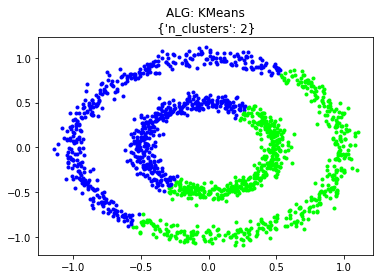

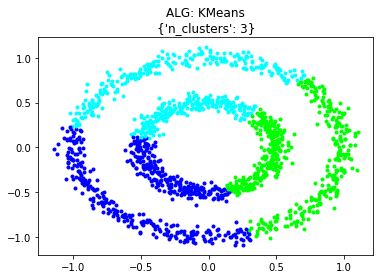

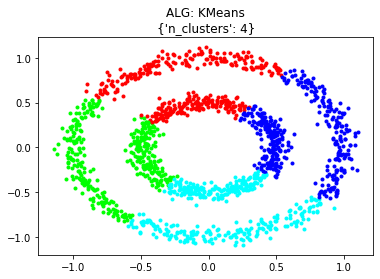

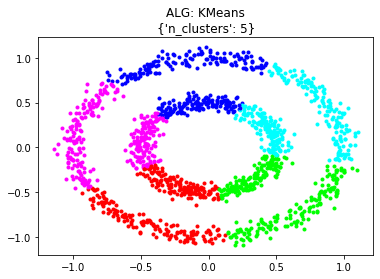

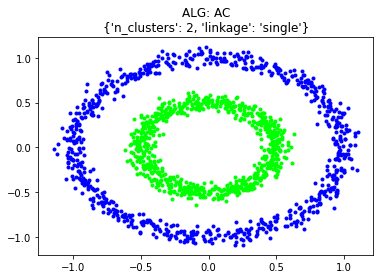

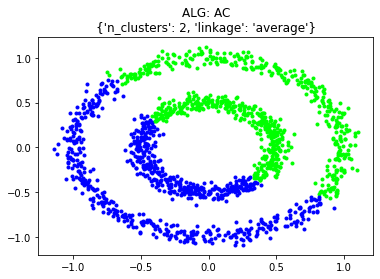

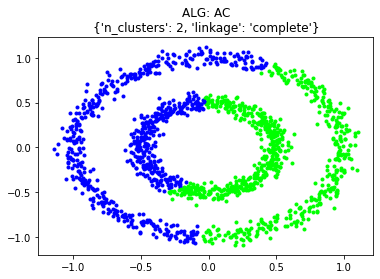

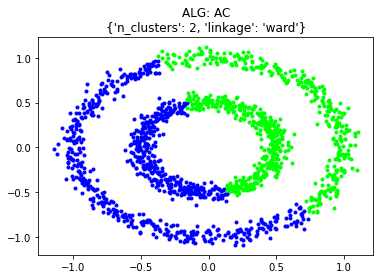

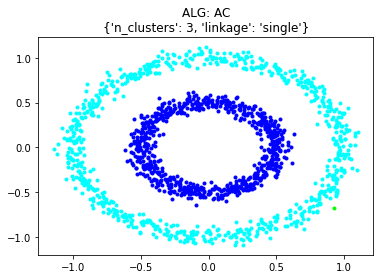

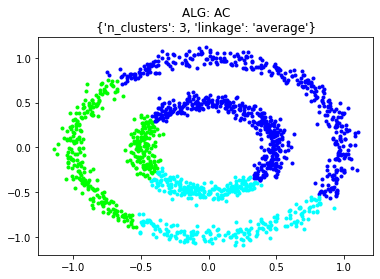

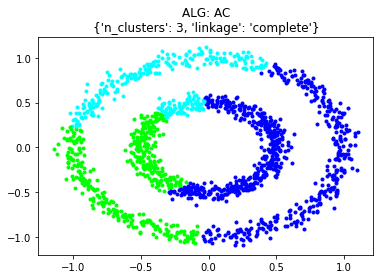

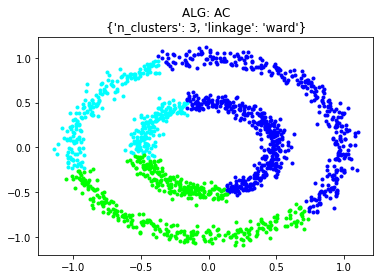

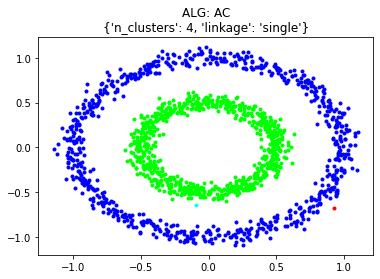

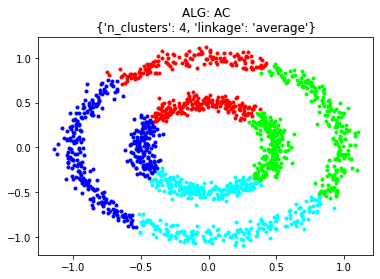

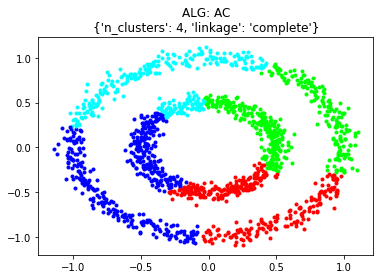

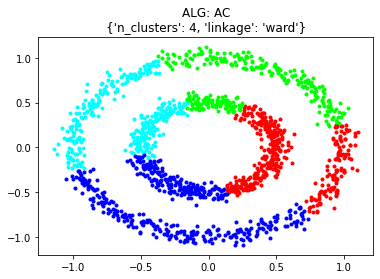

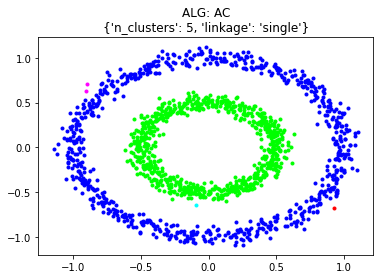

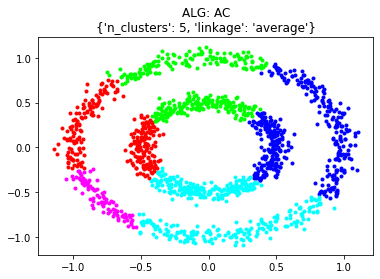

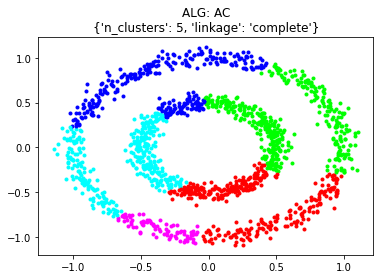

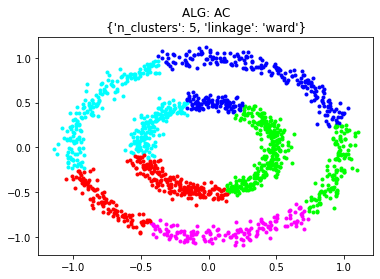

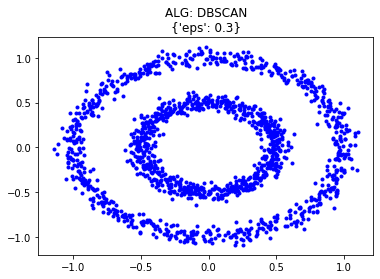

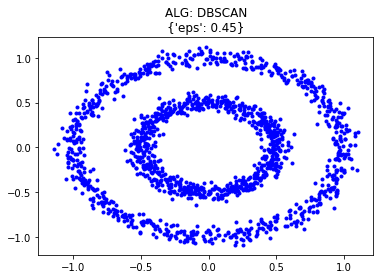

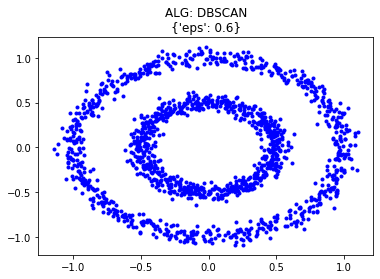

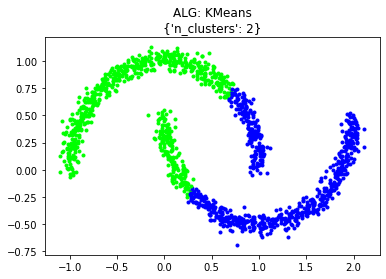

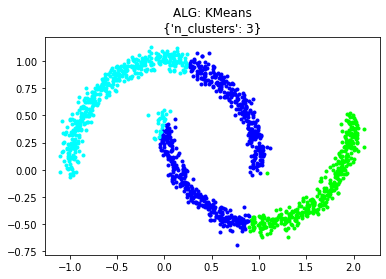

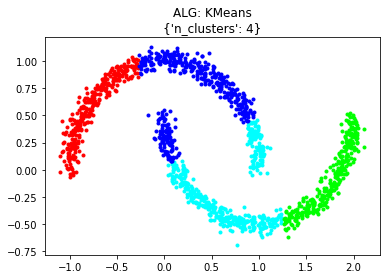

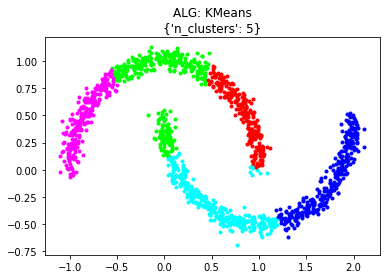

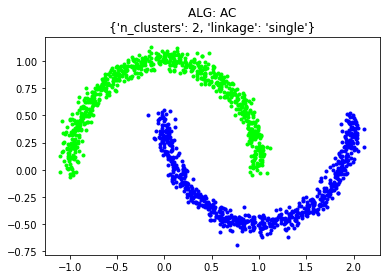

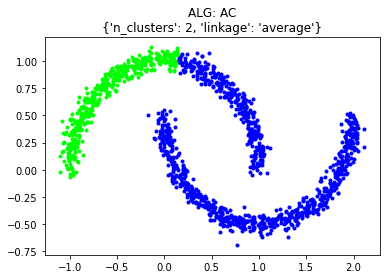

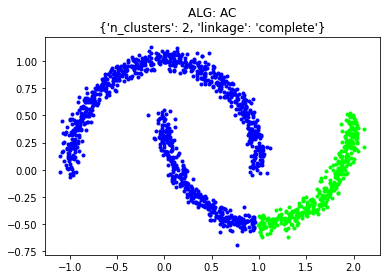

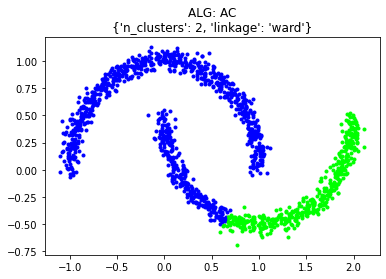

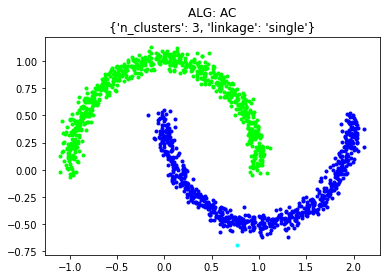

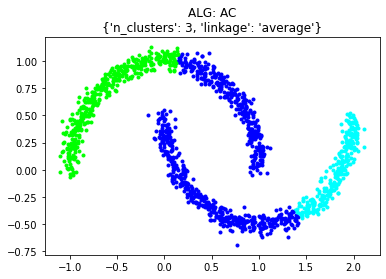

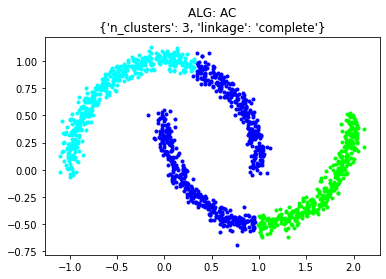

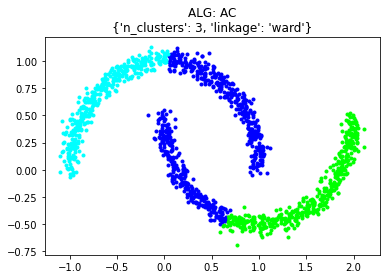

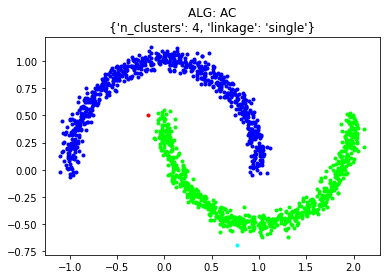

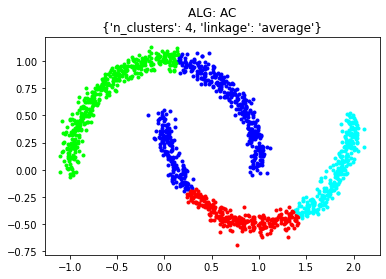

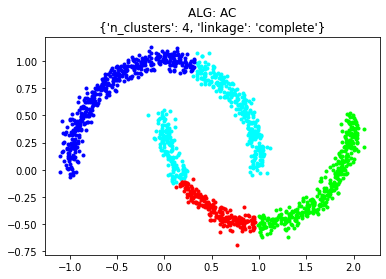

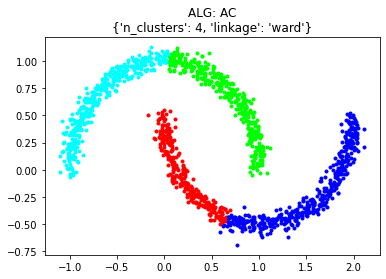

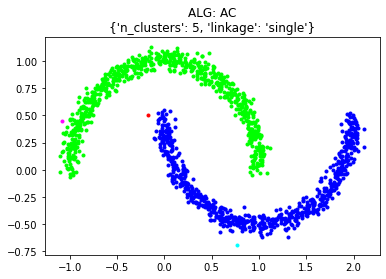

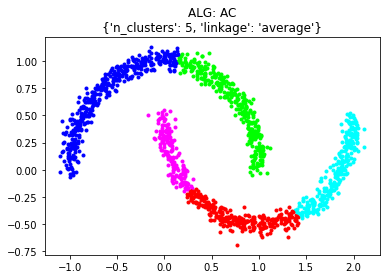

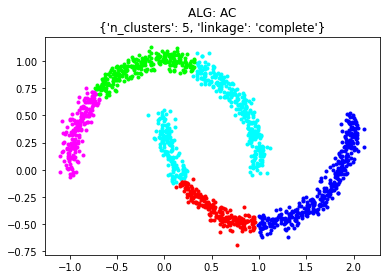

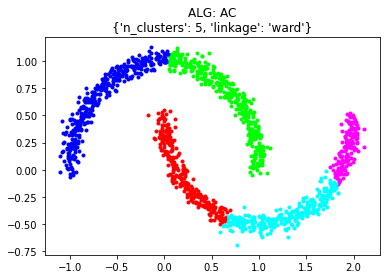

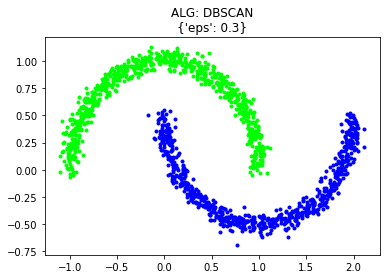

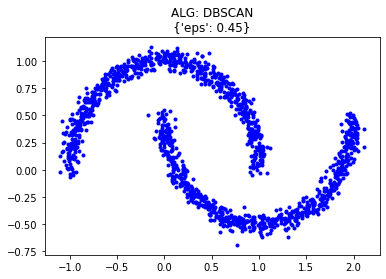

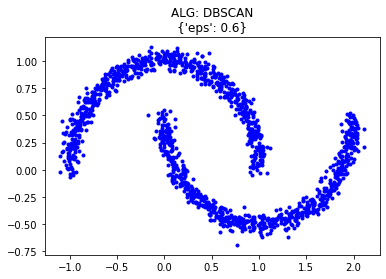

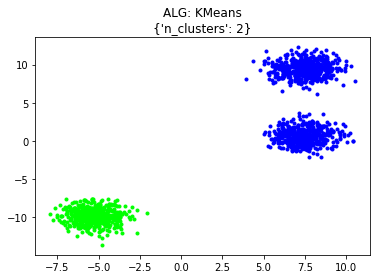

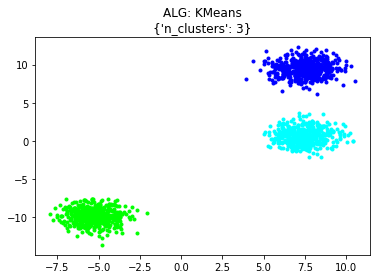

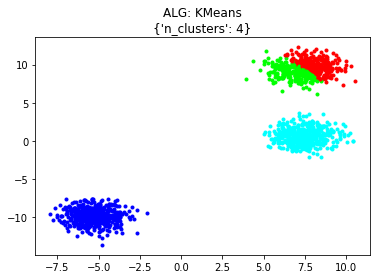

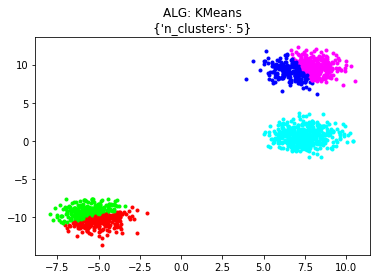

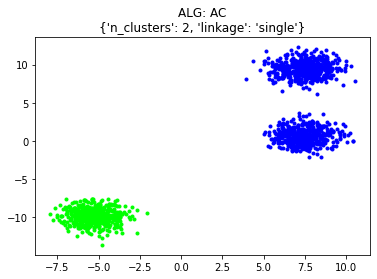

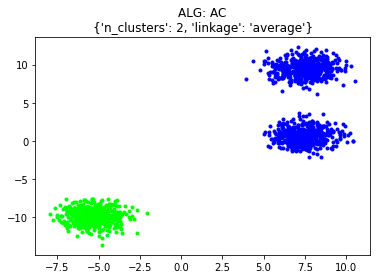

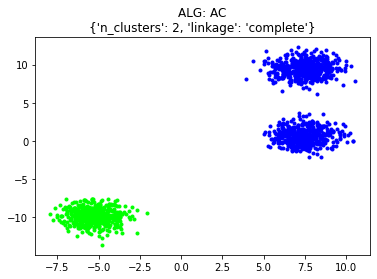

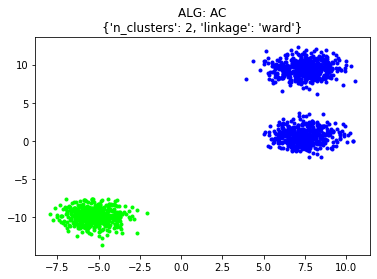

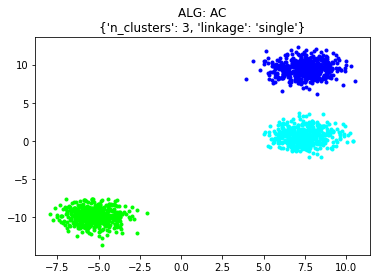

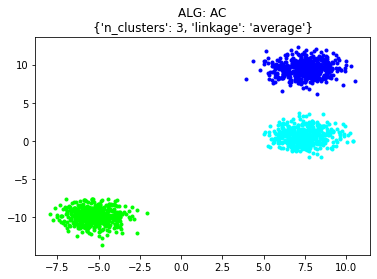

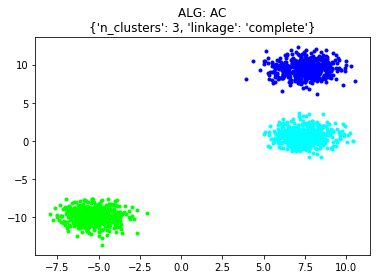

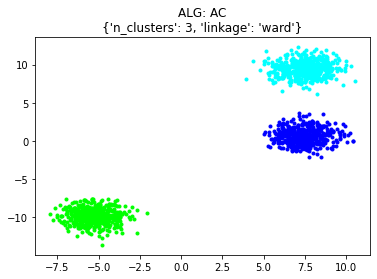

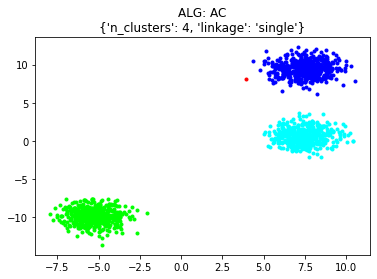

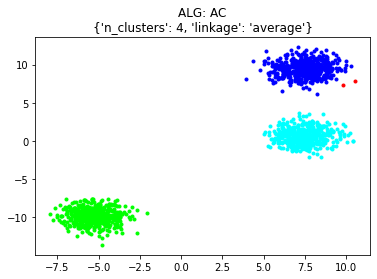

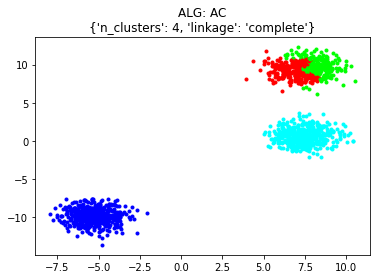

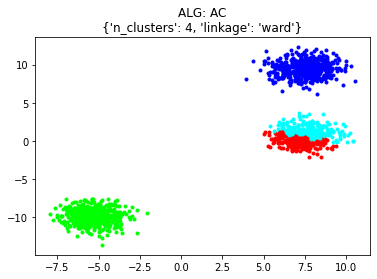

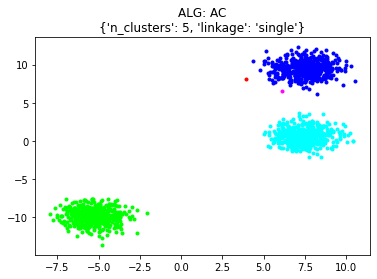

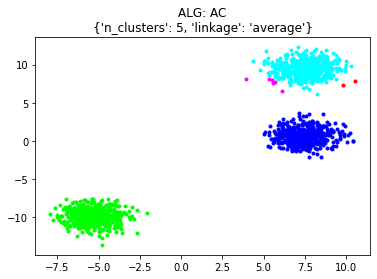

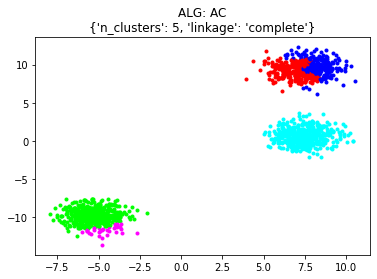

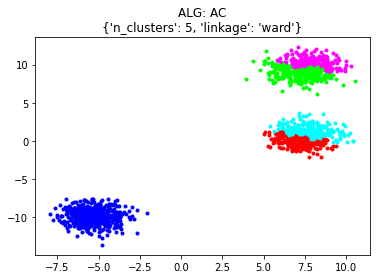

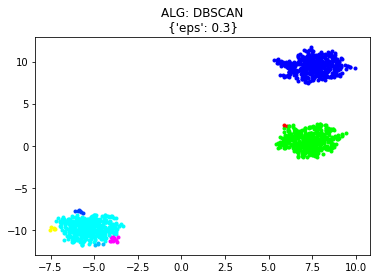

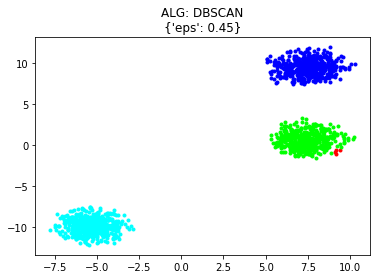

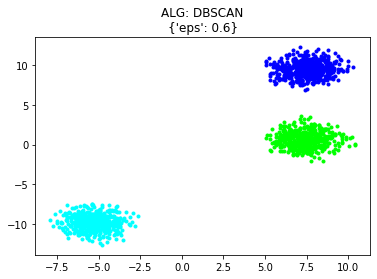

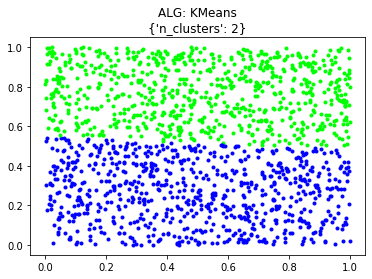

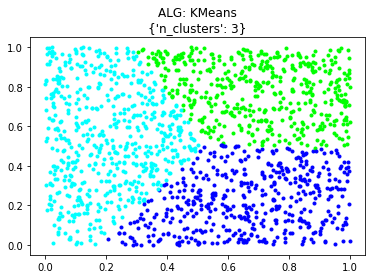

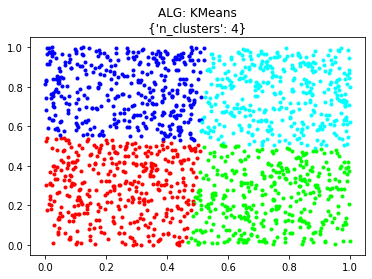

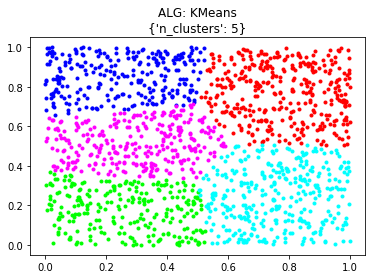

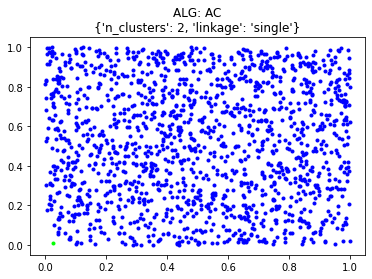

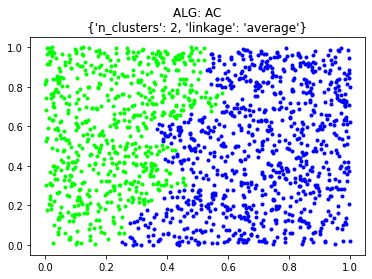

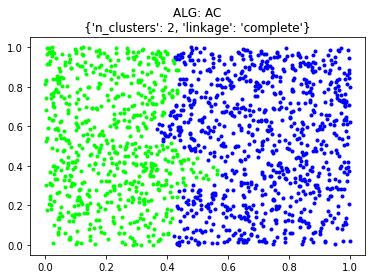

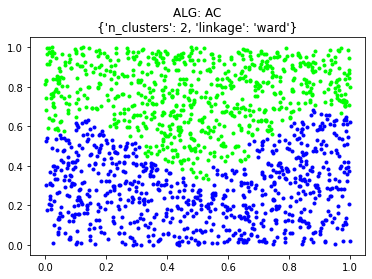

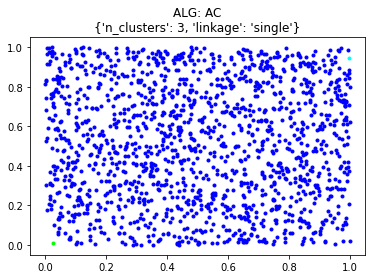

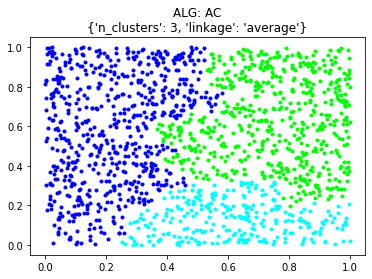

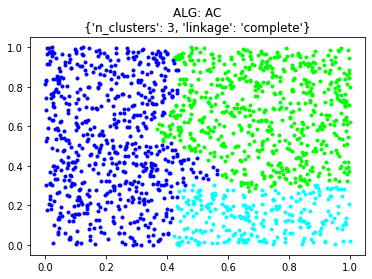

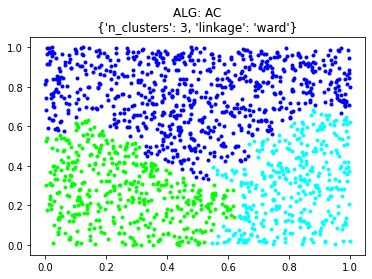

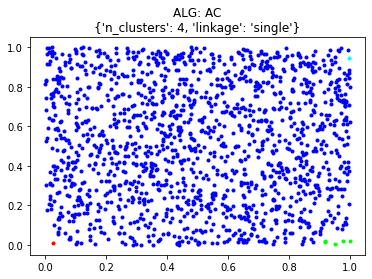

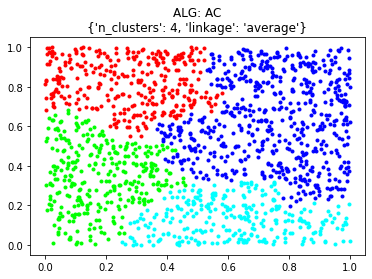

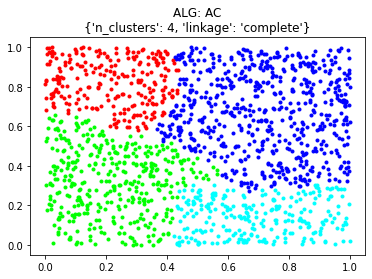

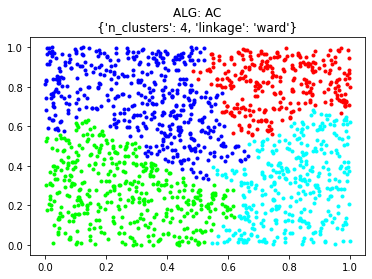

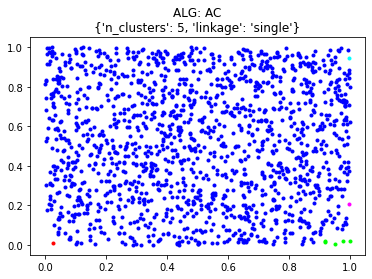

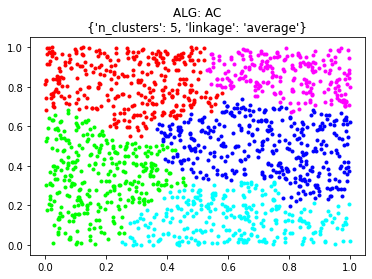

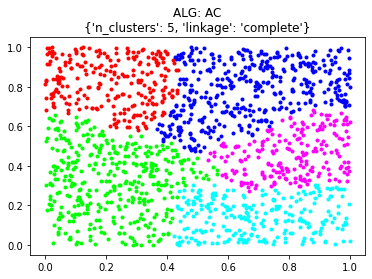

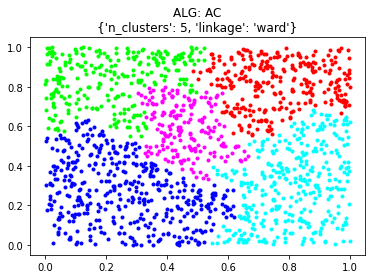

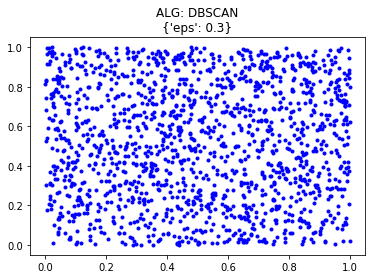

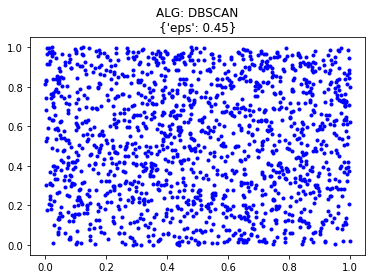

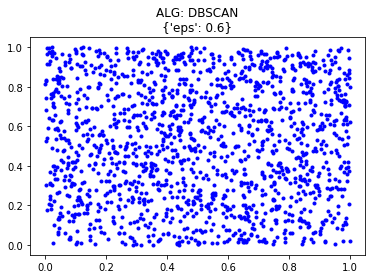

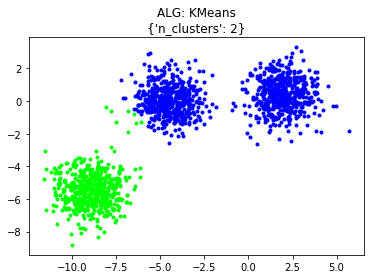

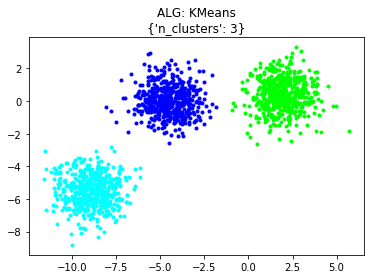

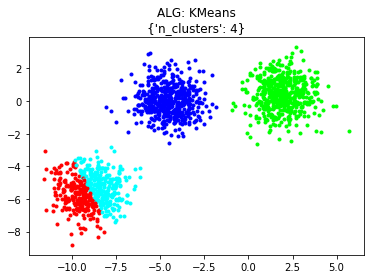

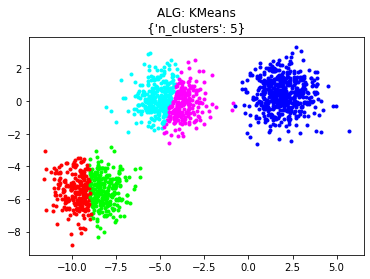

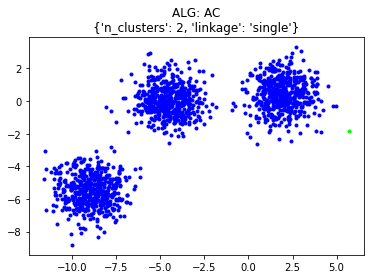

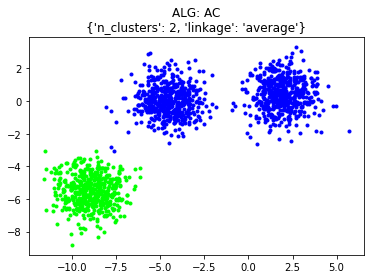

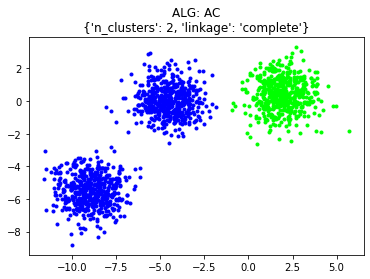

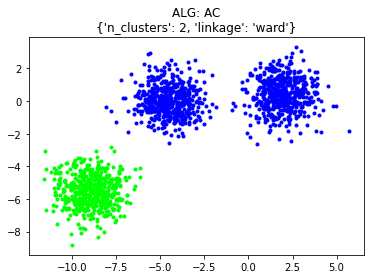

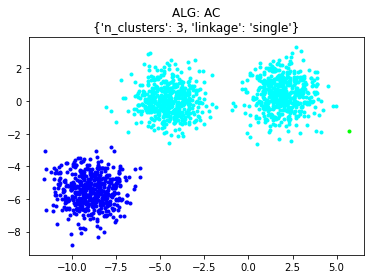

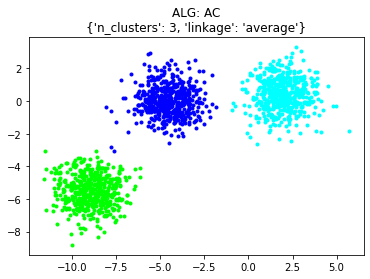

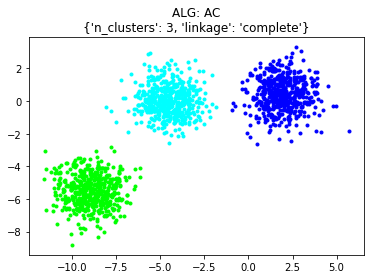

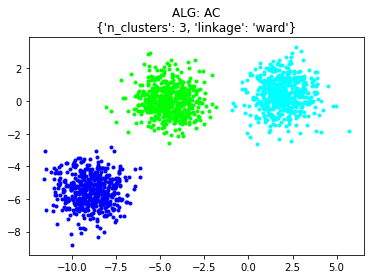

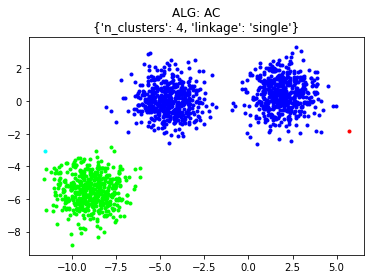

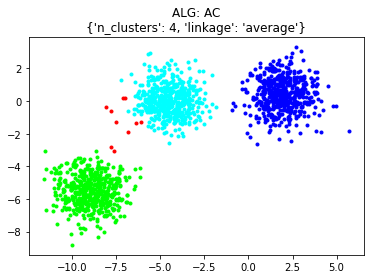

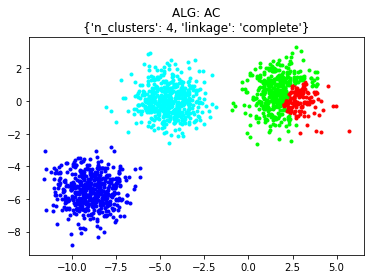

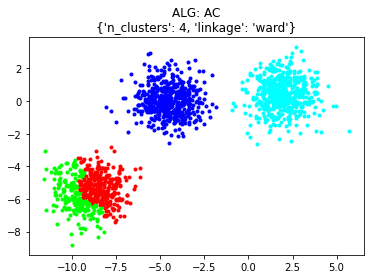

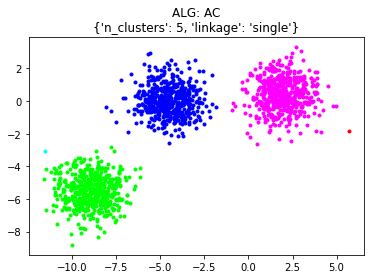

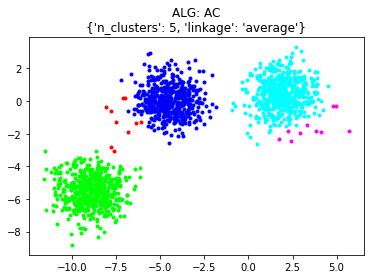

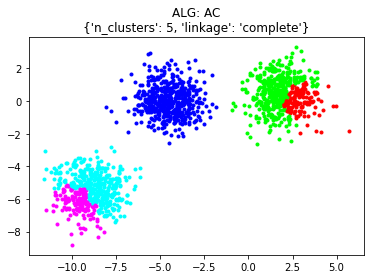

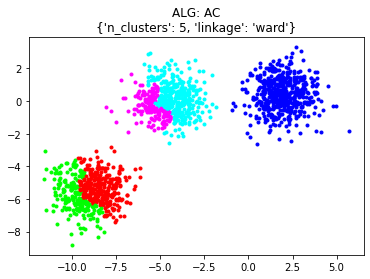

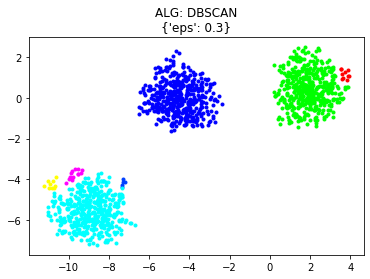

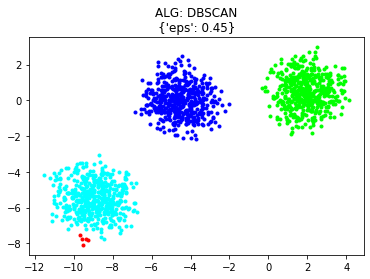

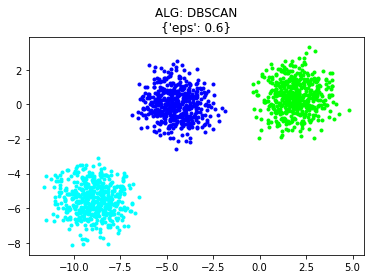

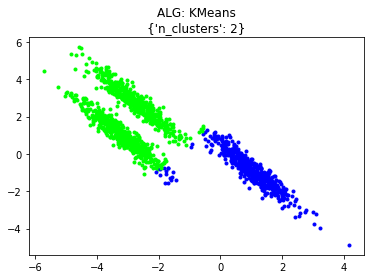

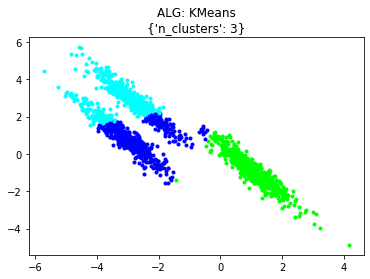

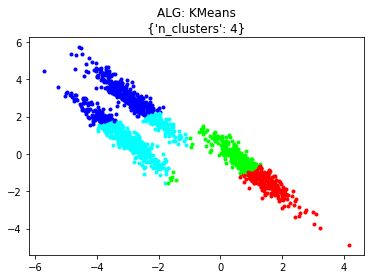

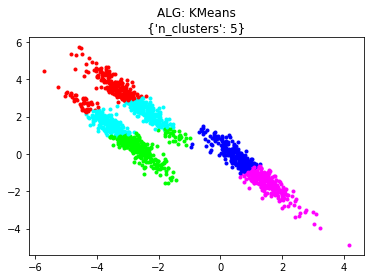

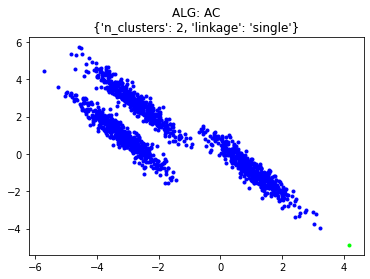

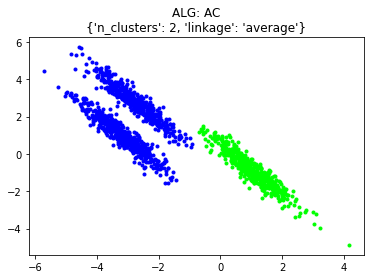

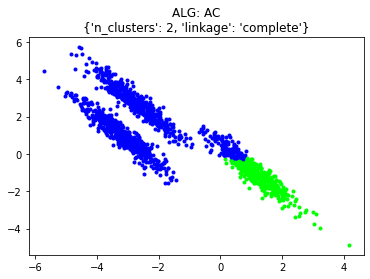

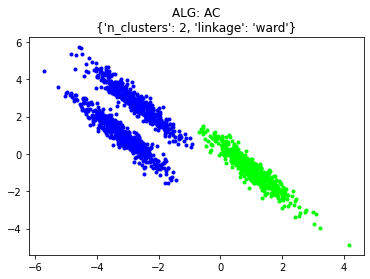

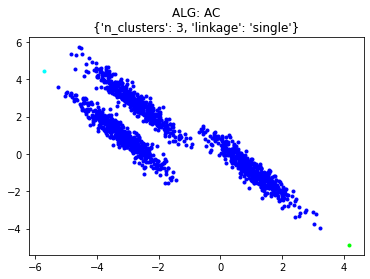

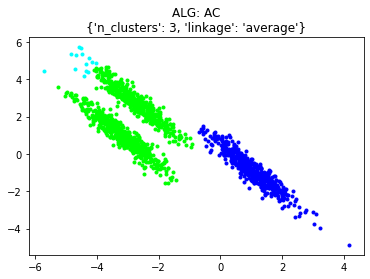

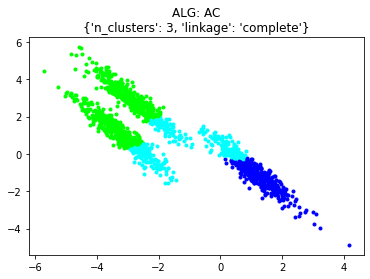

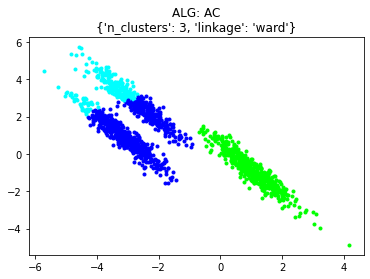

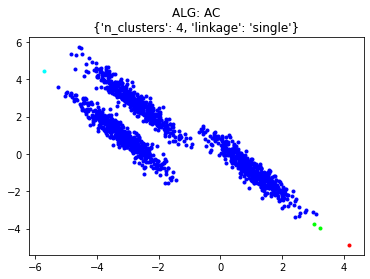

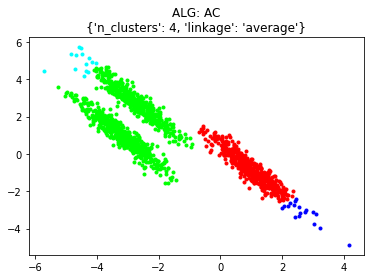

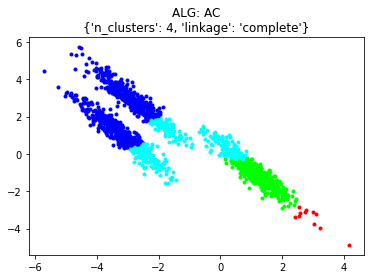

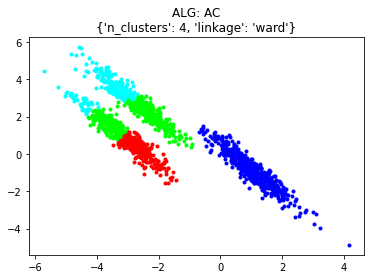

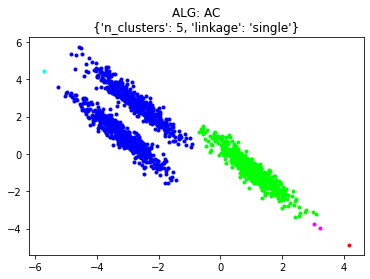

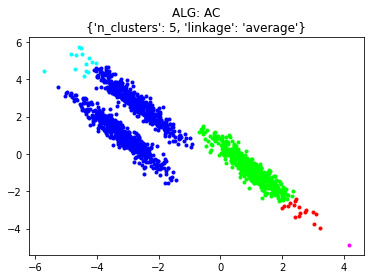

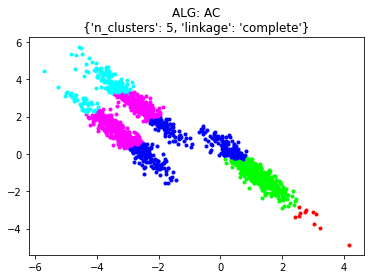

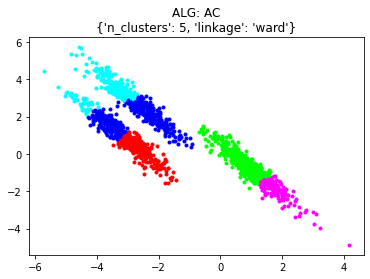

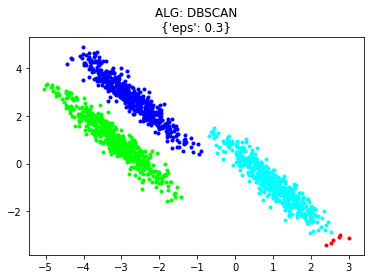

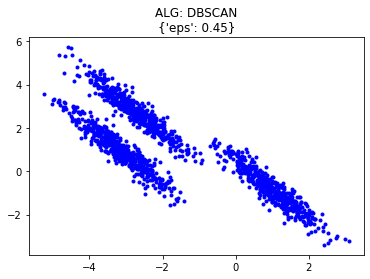

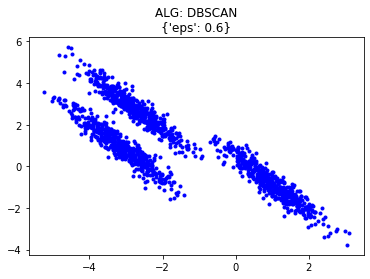

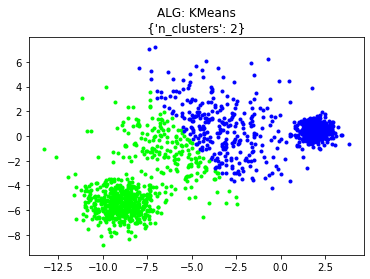

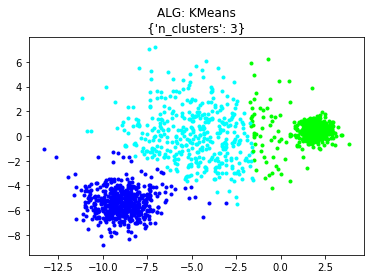

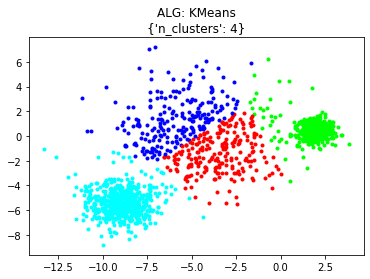

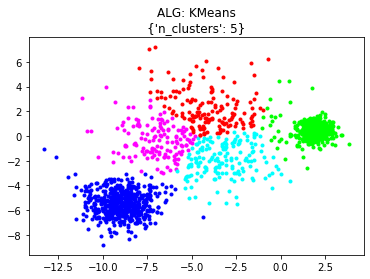

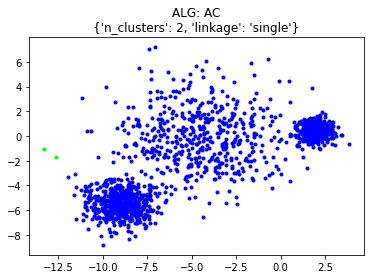

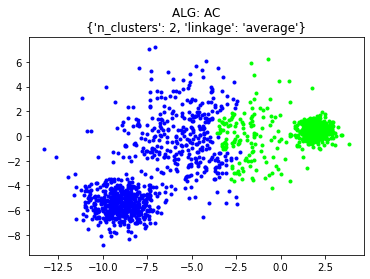

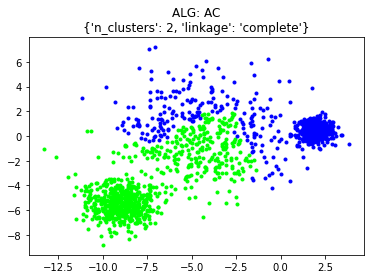

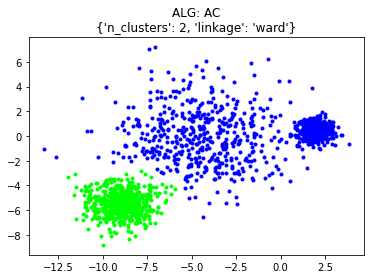

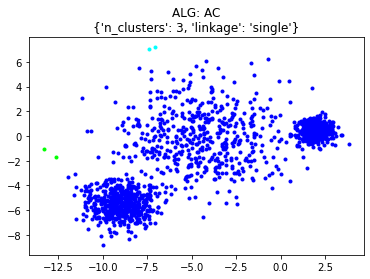

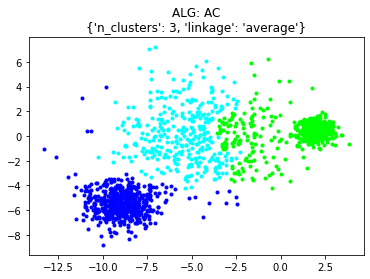

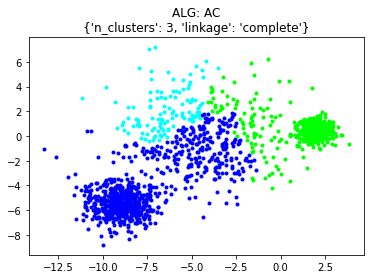

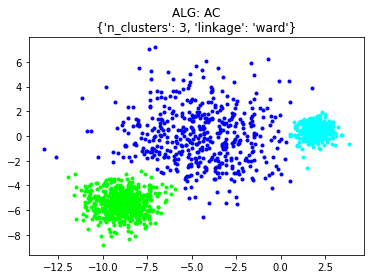

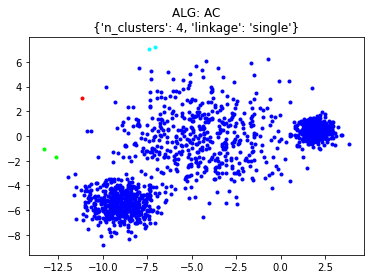

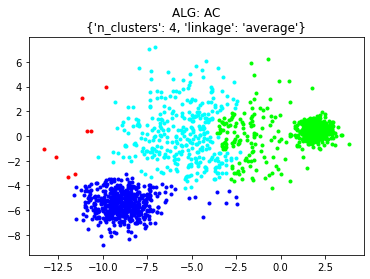

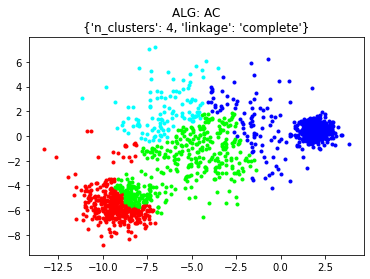

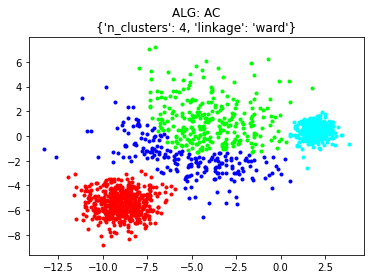

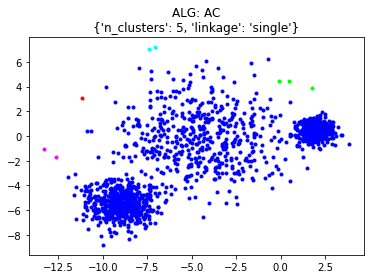

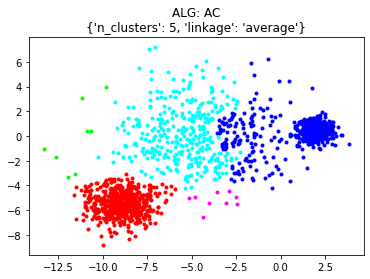

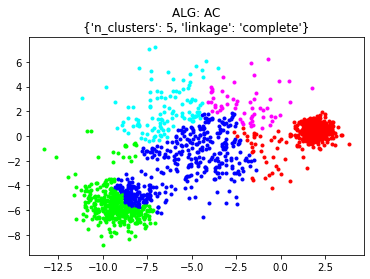

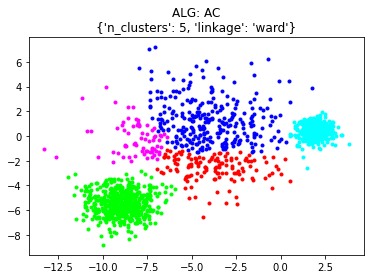

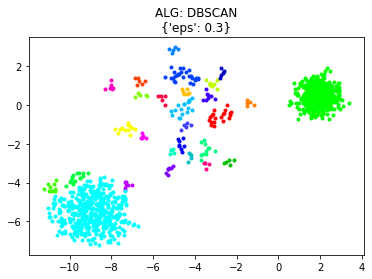

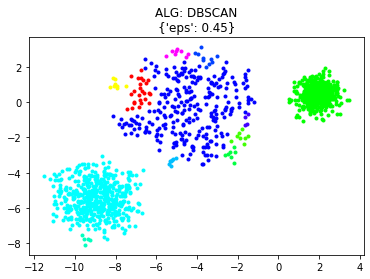

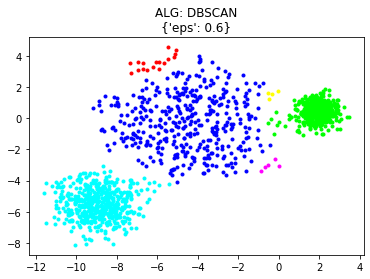

In [49]:
for dataset in my_datasets:
    X, y = dataset
    for fitter_cls, params_list, name in zip(fitters, params, names):
        for params_to_fitter in params_list:
            plt.figure()
            fitter = fitter_cls(**params_to_fitter)
            fitter.fit(X)
            labels = fitter.fit_predict(X)
            for sample_nr in range(X.shape[0]):
                label = labels[sample_nr]
                if label != -1:
                    color = colors[label]
                    plt.plot(*X[sample_nr],'.', color=color)
            plt.title(f"ALG: {name}\n{str(params_to_fitter)}")
            plt.show()

# najlepsze wyniki:
dataset 1
    n_clusters = 2
    algorytm AC
    linkage single
dataset 2
    n_clusters = 2
    algorytm AC
    linkage single
dataset 3
    algorytm KMeans, AC, DBSCAN (eps=0.6)
    n_clusters = 3
dataset 5
    algorytm KMeans, AC(bez single)
    n_clusters = 3
dataset 6
    algorytm DBSCAN eps = 0.3
dataset 7
    algorytm AC (n=3, l = ward)
